<center><img src="https://raw.githubusercontent.com/tquangsdh20/winedataset/main/.github/wine_logo.svg"></center>
<center><img src="https://img.shields.io/badge/Group5-Le%20Thai%20%7C%20Tran%20Quang%20%7C%20Le%20Thai%20Duy%20%7C%20Le%20Nhu%20Chien%20%7C%20Phan%20Van%20Trung-blue?style=plastic"> <img src="https://img.shields.io/badge/Lecturer-Nguyen%20Hoang%20Dzung-orange?style=plastic"> <img src="https://img.shields.io/badge/version-4.0.5-blue?style=plastic&logo=R"></center>

## 1. Thu thập dữ liệu (Data Collection)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dữ liệu gồm có hai tập *datasets* về các mẫu rượu vang đỏ và trắng thu thập ở phía bắc của Bồ Đào Nha nhằm mô hình hóa chất lượng của rượu vang dựa trên các kiểm nghiệm hóa lý. Tập dữ liệu nghiêm cứu được lấy từ [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) có thể tải về [tại đây](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/).

### 1.1. Mô tả dữ liệu
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hai bộ dữ liệu trên liên quan đến các biến thể về rượu vang trắng và đỏ ở Bồ Đào Nha, tập dữ liệu về rượu vang trắng gồm có 4898 bản ghi (individuals) và rượu vang đỏ có 1599 bản ghi (individuals). Trong đó, dữ liệu phân tích gồm có 12 biến dữ liệu, trong đó có 11 biến là các thông số thành phần hóa lý và 1 biến đánh giá chất lượng.

### 1.2. Đặt vấn đề
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bài toán được đặt ra trong nghiên cứu này liệu có thể tiên lượng được chất lượng của loại rượu dựa trên các thành phần hóa lý của nó hay không? Và màu sắc của rượu có phụ thuộc vào các thành phần hóa lý trên hay không?

## 2. Trình bày dữ liệu

Dữ liệu trong hai tập trên gồm 12 biến như sau:

- **fixed.acidity**: thông số đo độ chua cố định
- **volatile.acidity**: mức độ bay hơi của rượu
- **citric.acid**: nồng độ Axit Citric
- **residual.sugar**: lượng đường
- **chlorides**: nồng độ Clo
- **free.sulfur.dioxide**: các thành phần $SO_2$ tự do
- **total.sulfur.dioxide**: tổng số gốc $SO_2$
- **density**: mức độ đậm đặc của rượu
- **pH**: nồng độ pH
- **sulphates**: các gốc $SO_4$
- **alcohol**: nồng độ cồn
- **quality**: kết quả chất lượng được đánh giá theo thang điểm từ 1-10


Đọc hai tập dữ liệu vào và tiến hành các bước tiền xử lý

In [181]:
require(dplyr)
require(ggplot2)
require(rpart)
require(caret)
require(rpart.plot)
require(FactoMineR)
require(PerformanceAnalytics)

In [20]:
set.seed(1)
red_wine = read.csv('winequality-red.csv',sep = ';')
white_wine = read.csv('winequality-white.csv',sep = ';')
white_wine = white_wine %>% sample_frac(0.3264)

Ghép hai tập dữ liệu lại và thêm một biến **type** để gắn nhãn cho các loại phân tích (*white và red*)

In [80]:
wine_dat <- rbind(
    data.frame(white_wine,type='white')
    ,data.frame(red_wine,type='red')
)
wine_dat$type <- as.factor(wine_dat$type)
# wine_dat$quality <- as.factor(wine_dat$quality)
head(wine_dat)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,6.8,0.37,0.47,11.2,0.071,44.0,136,0.99680,2.98,0.88,9.2,5,white
2,7.1,0.24,0.34,1.2,0.045,6.0,132,0.99132,3.16,0.46,11.2,4,white
3,6.9,0.32,0.13,7.8,0.042,11.0,117,0.99600,3.23,0.37,9.2,5,white
4,7.5,0.23,0.49,7.7,0.049,61.0,209,0.99410,3.14,0.30,11.1,7,white
5,8.6,0.36,0.26,11.1,0.030,43.5,171,0.99480,3.03,0.49,12.0,5,white
6,7.7,0.28,0.63,11.1,0.039,58.0,179,0.99790,3.08,0.44,8.8,4,white


## 3. Phân tích và giải thích dữ liệu

Trước khi chọn phương pháp phân tích ta kiểm tra lại phân bố về chất lượng của loại rượu được phân bố như thế nào

### 3.1. Biểu diễn phân bố chất lượng của rượu

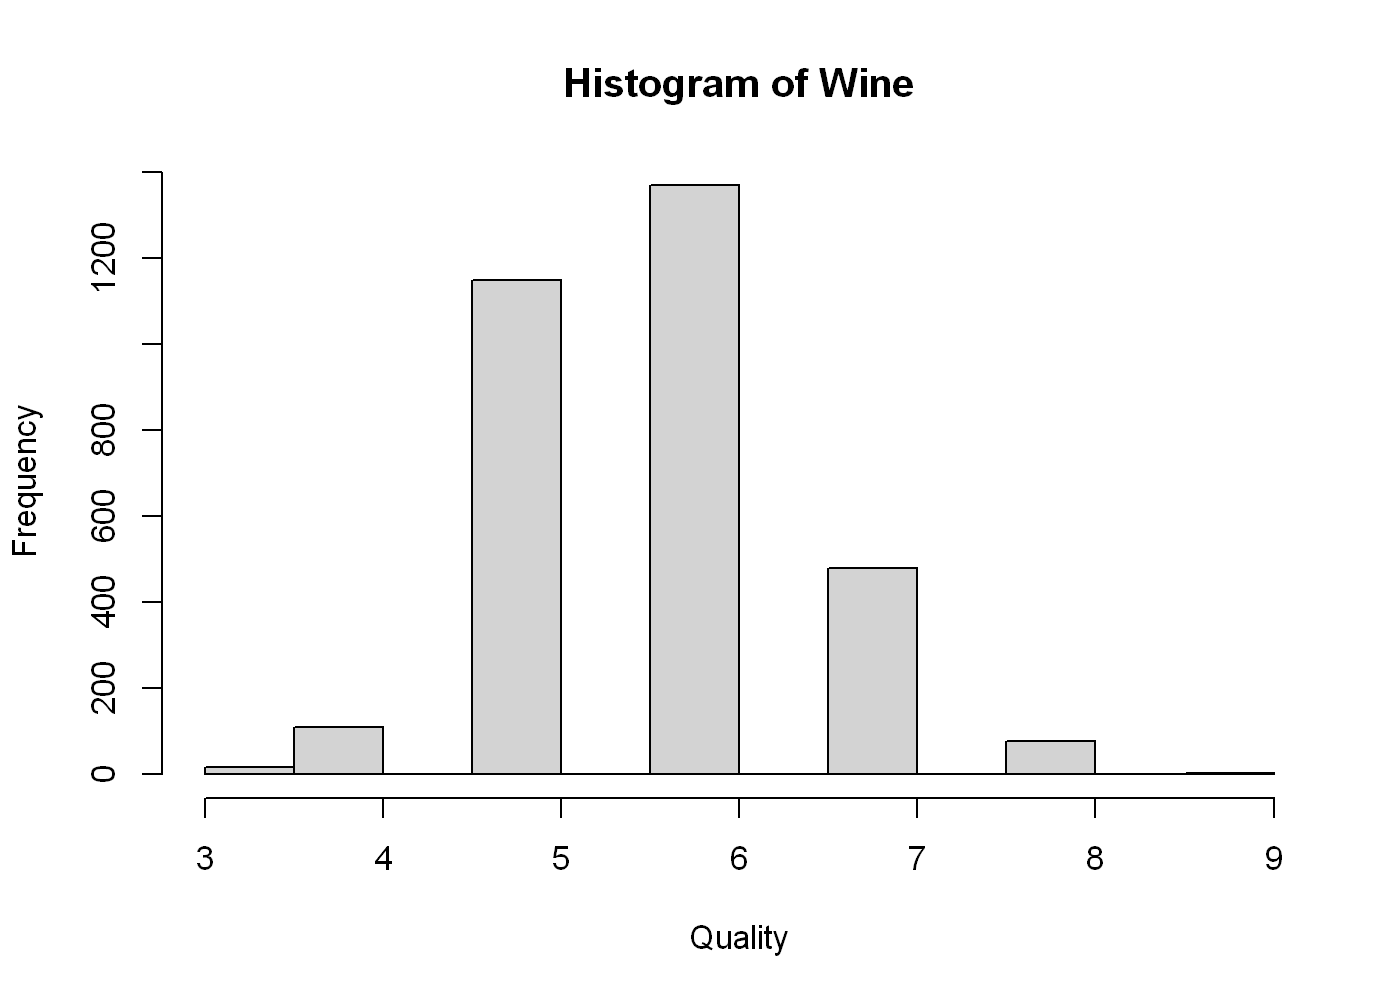

In [81]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
hist(wine_dat$quality,xlab='Quality',main='Histogram of Wine')

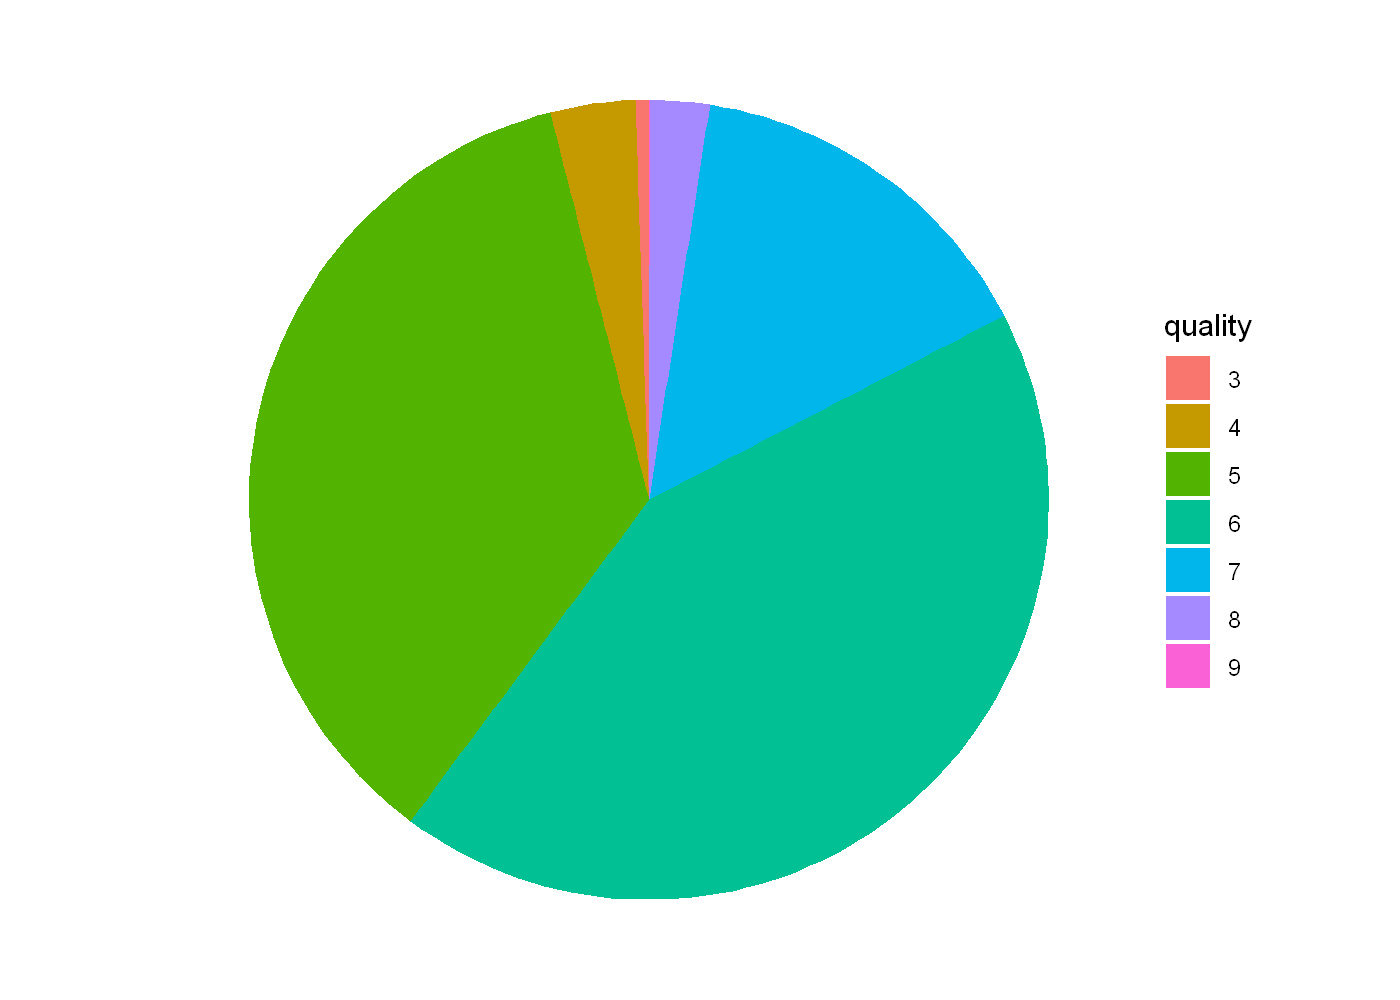

In [82]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
pie_dat = data.frame(value=c(17,110,1147,1368,478,76,2),quality=as.factor(3:9))
ggplot(pie_dat, aes(x = "", y = value, fill = quality)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start=0) +theme_void()

Từ biểu đồ phân bố về chất lượng của rượu được đánh giá từ 3 đến 9 trên thang điểm 10. Tuy nhiên, thang điểm 5 và 6 chiếm nhiều nhất. Ít nhất là điểm 9 chỉ có 2 loại rượu được đánh giá là 9.

### 3.2. Quan hệ giữa các biến với nhau

Dưới đây là biểu đồ biểu diễn ma trận tương quan giữa các biến dữ liệu trong tập dữ liệu phân tích

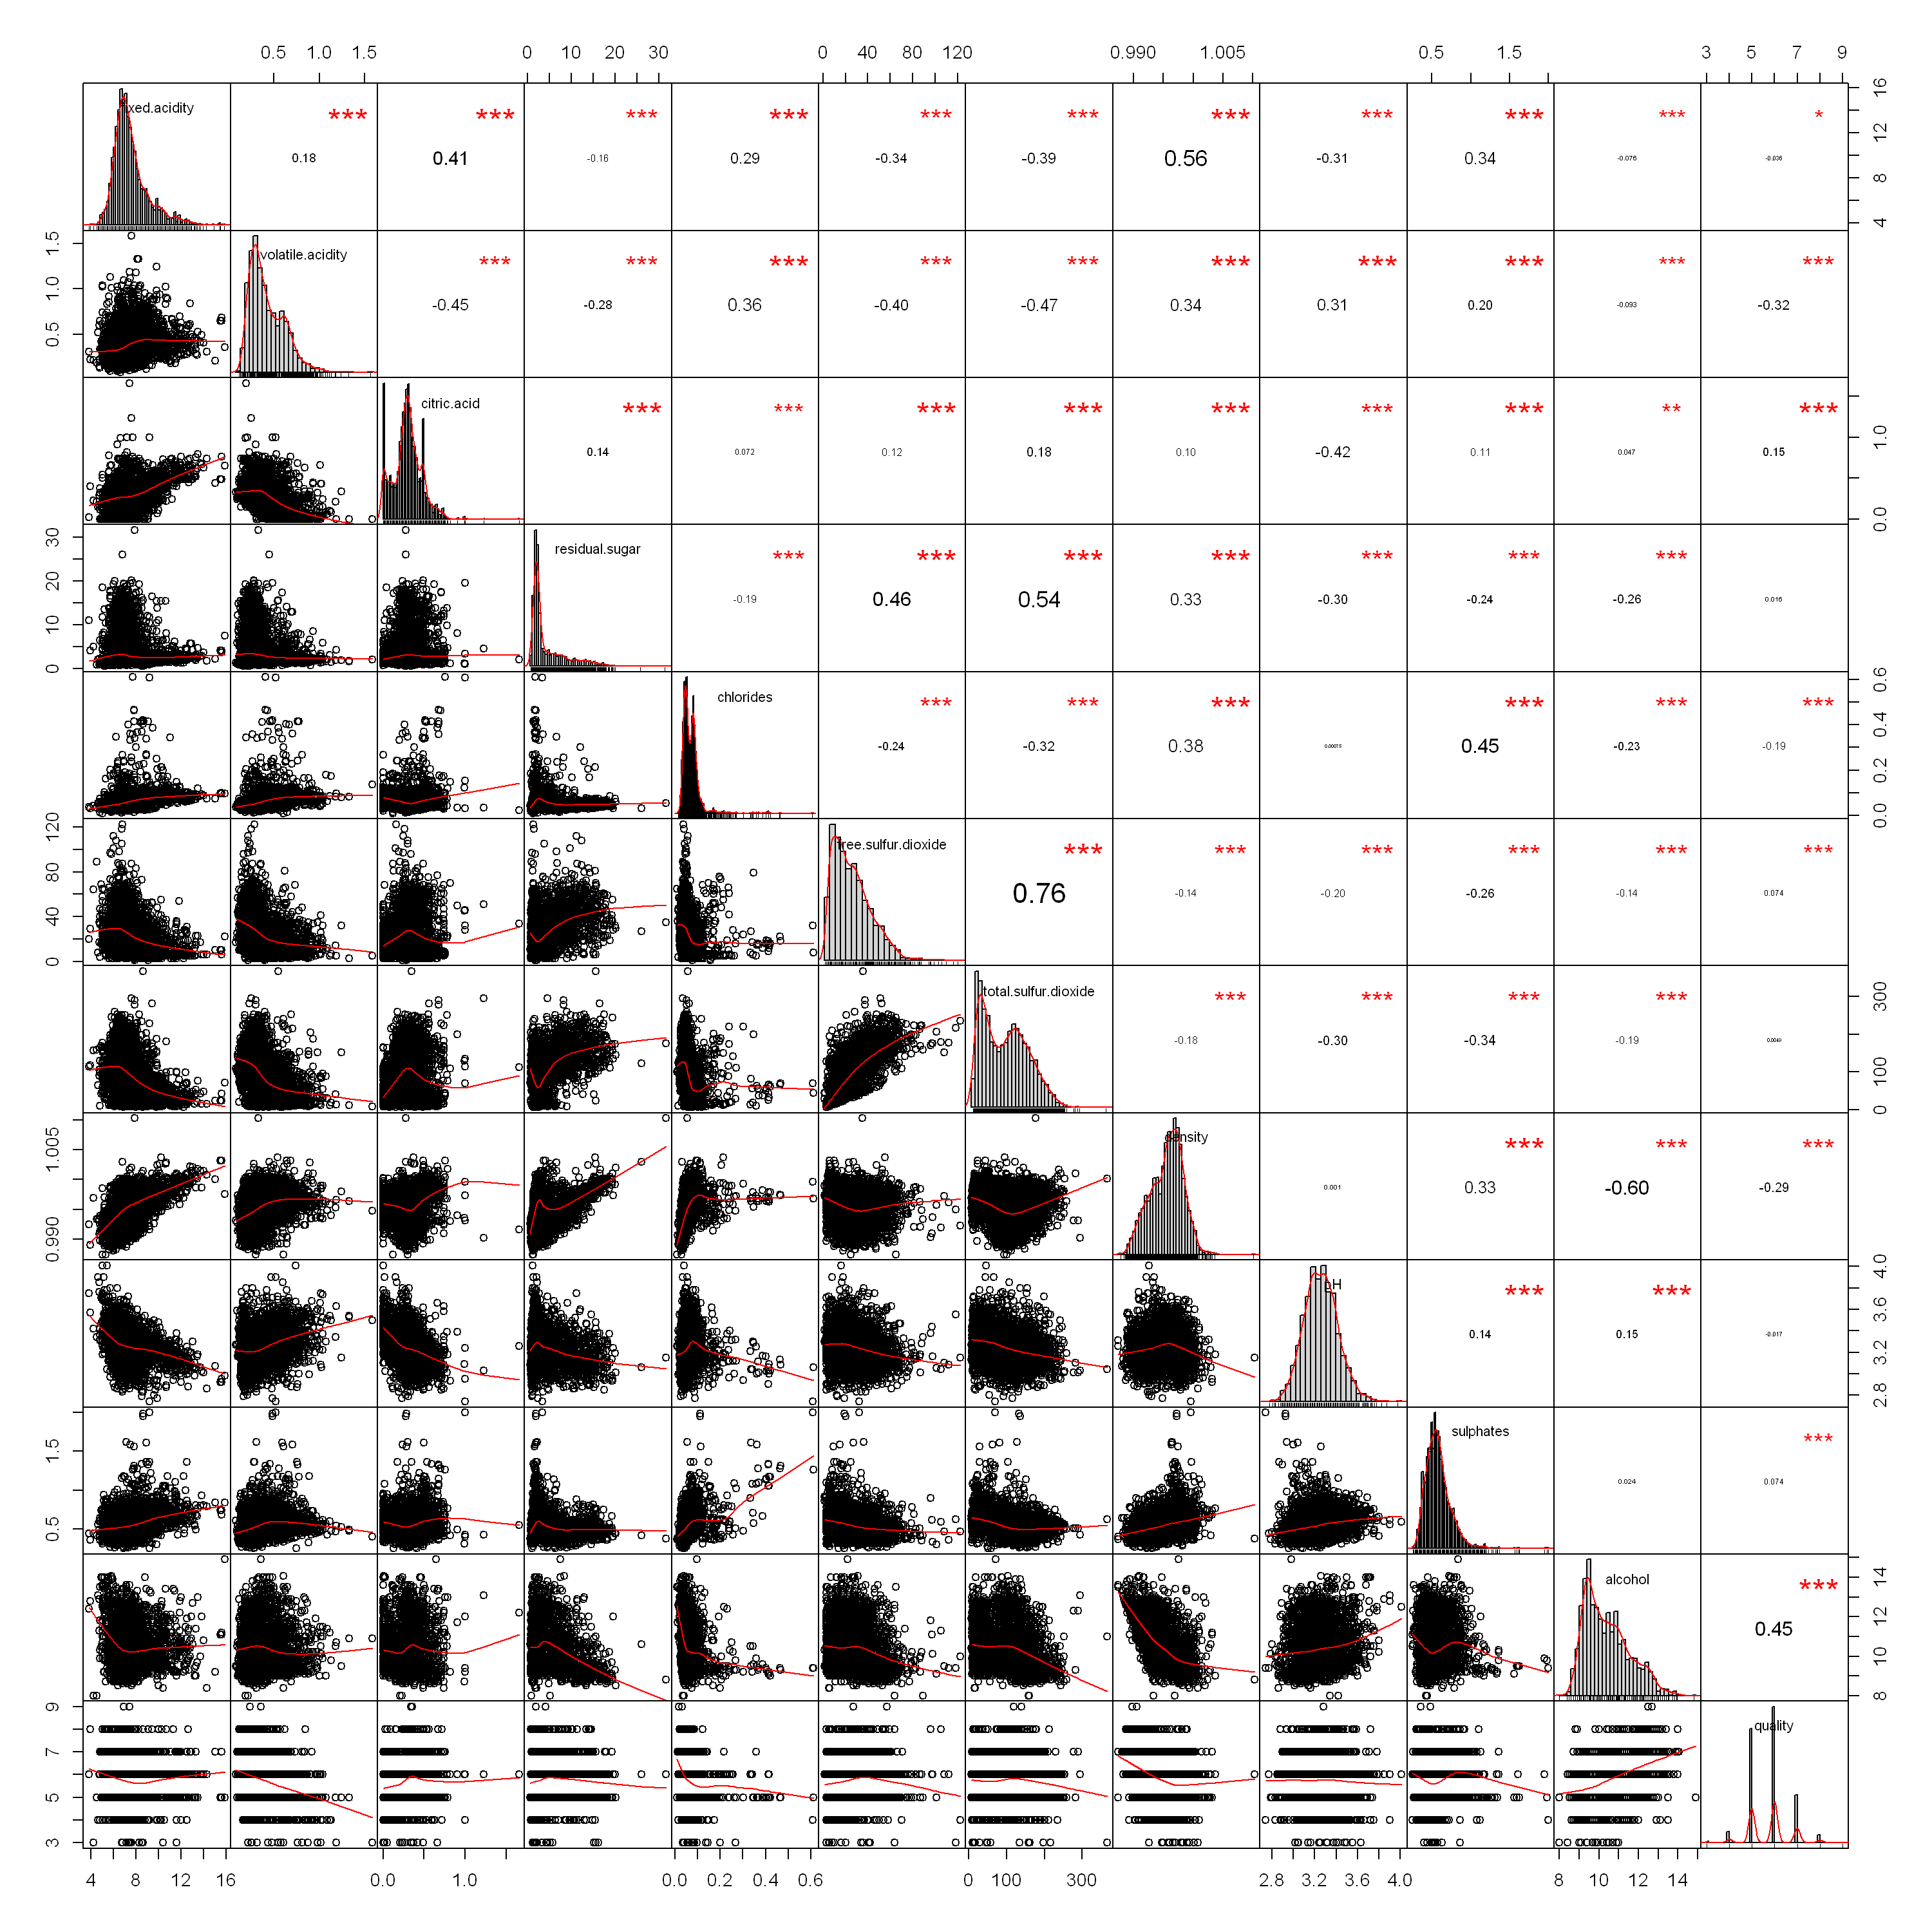

In [84]:
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 250)
chart.Correlation(wine_dat[,1:12],histogram=TRUE,pch="+")

<p>Biểu đồ trên cho thấy một số biến có ảnh hưởng đến nhau như sau:

<div align="justify">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Độ chua cố định của rượu <i>(fixed.acidity)</i> bị ảnh hưởng bởi các yếu tố mức độ bay hơi <i>(volatile.acidity)</i>, nồng độ Clo <i>(chlorides)</i>, nồng độ các gốc SO$_4$ <i>(sulphates)</i>, nồng độ axit citric trong rượu <i>(citric.acid)</i> và mức độ đậm đặc của rượu <i>(density)</i> với mức độ ảnh hưởng tăng dần theo tương quan thuận. Trong đó, hai thông số có ảnh hưởng lớn nhất đến độ chua là mức độ đậm đặc của rượu và nồng độ axit citric trong rượu với hệ số tương quan lần lượt là <i>0.56 và 0.41</i>, theo kết quả cho thấy sự khác biệt về độ chua của rượu trong dữ liệu có thể giải thích được <i>16.81%</i> dựa trên sự khác biệt về nồng độ axit citrid của các loại rượu và <i>31.36%</i> dựa trên sự khác biệt về nồng độ. Ngoài ra, độ chua cố định có tương quan nghịch với ... </div>
<div align="justify"></div>

<div align="justify">Tương tự với mức độ bay hơi, độ đậm đặc của rượu và chất lượng quality</div>
</p> 

### 3.3. Phân tích thành phần chính (PCA)

In [144]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
res.pca <- PCA(wine_dat
               ,quanti.sup=12
               ,quali.sup=13
              ,scale.unit=TRUE)
round(res.pca$eig,2)

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.34,30.40,30.40
comp 2,2.36,21.43,51.83
comp 3,1.64,14.93,66.75
comp 4,0.92,8.37,75.12
comp 5,0.74,6.70,81.83
comp 6,0.57,5.15,86.97
comp 7,0.48,4.35,91.32
comp 8,0.45,4.13,95.45
comp 9,0.28,2.55,98.00
comp 10,0.18,1.64,99.64


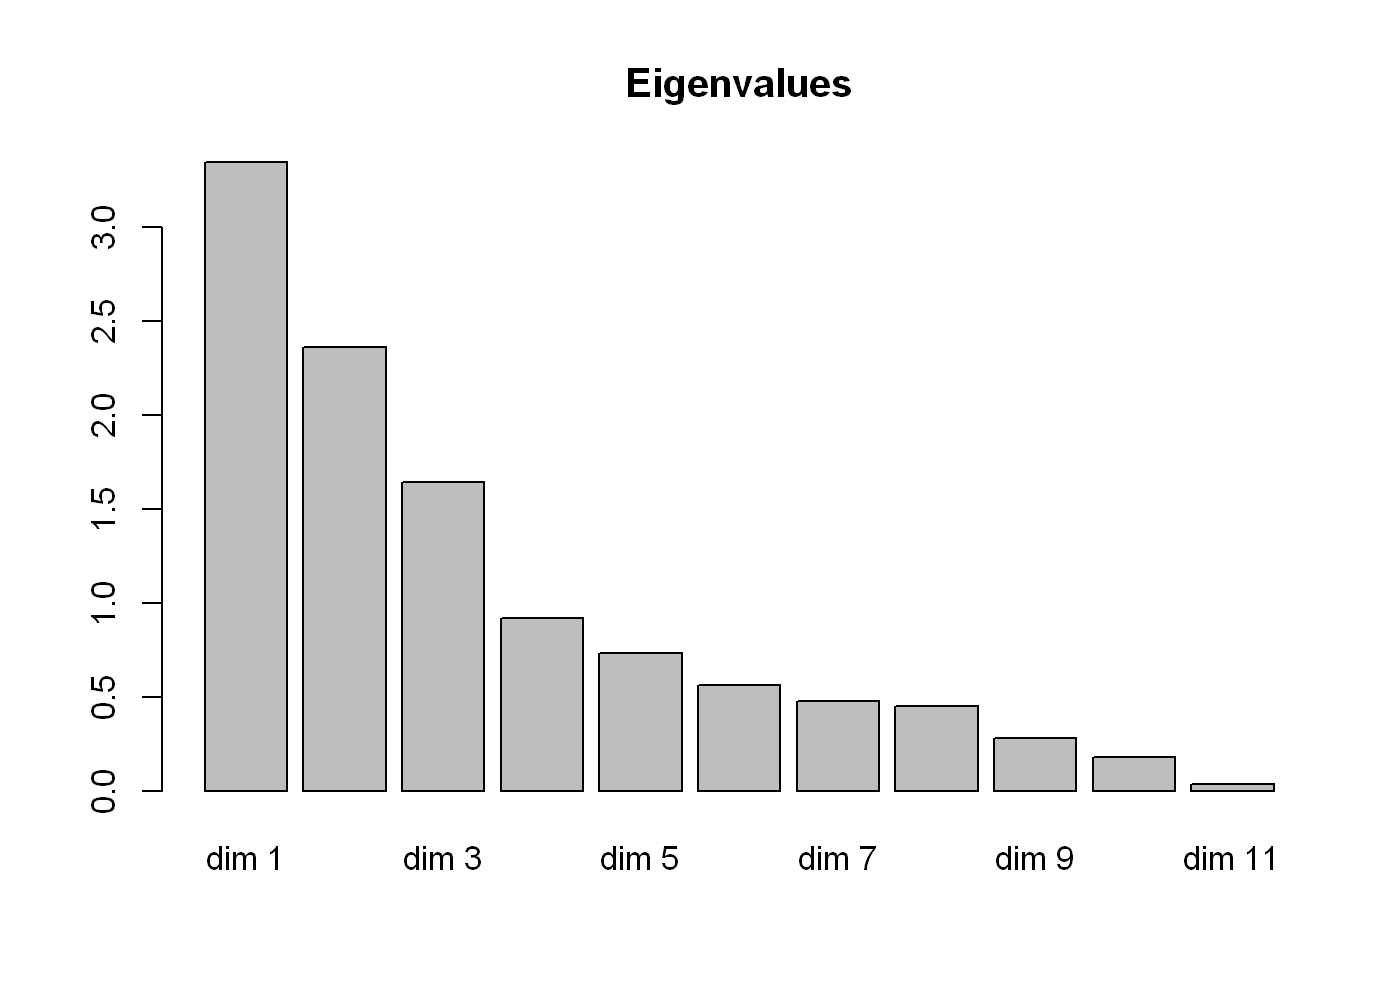

In [86]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
barplot(res.pca$eig[,1],main="Eigenvalues",
names.arg=paste("dim",1:nrow(res.pca$eig)))

Kết quả cho thấy hai chiều không gian chính Dim1 và Dim2 có thể giải thích được 51.83% các giao động của dữ liệu chưa bao gồm các biến giải thích *quality* và *type*, tỉ lệ giải thích là tương đối thấp tuy nhiên nó có thể diễn giải được cấu trúc cần thiết của dữ liệu, vì phân tích PCA trên gồm có 11 biến dữ liệu và lượng mẫu tương đối rất lớn gần 3200 mẫu thì tỉ lệ giải thích được cần thiết là trên 28.9%. Tuy nhiên sự biến đổi của các yếu tố lý hóa tác động đến chất lượng của rượu không thể chỉ giải thích được dữa trên hai chiều chính.

In [149]:
res.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
quality,-0.1588748,-0.1659027,-0.3776203,0.1430706,0.2174304
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
quality,-0.1588748,-0.1659027,-0.3776203,0.1430706,0.2174304
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
quality,0.0252412,0.0275237,0.1425971,0.02046921,0.047276


Qua kết quả đánh giá biến giải thích đối với các chiều không gian cho thấy rằng chất lượng của rượu nó đóng góp tốt nhất ở chiều không gian thứ 3 và thứ 5. Nên ta sẽ chọn chiều không gian này để biểu diễn theo biến chất lượng của rượu để phân tích.

#### Biểu diễn chiều Dim3 và Dim5 để xem xét chất lượng của rượu

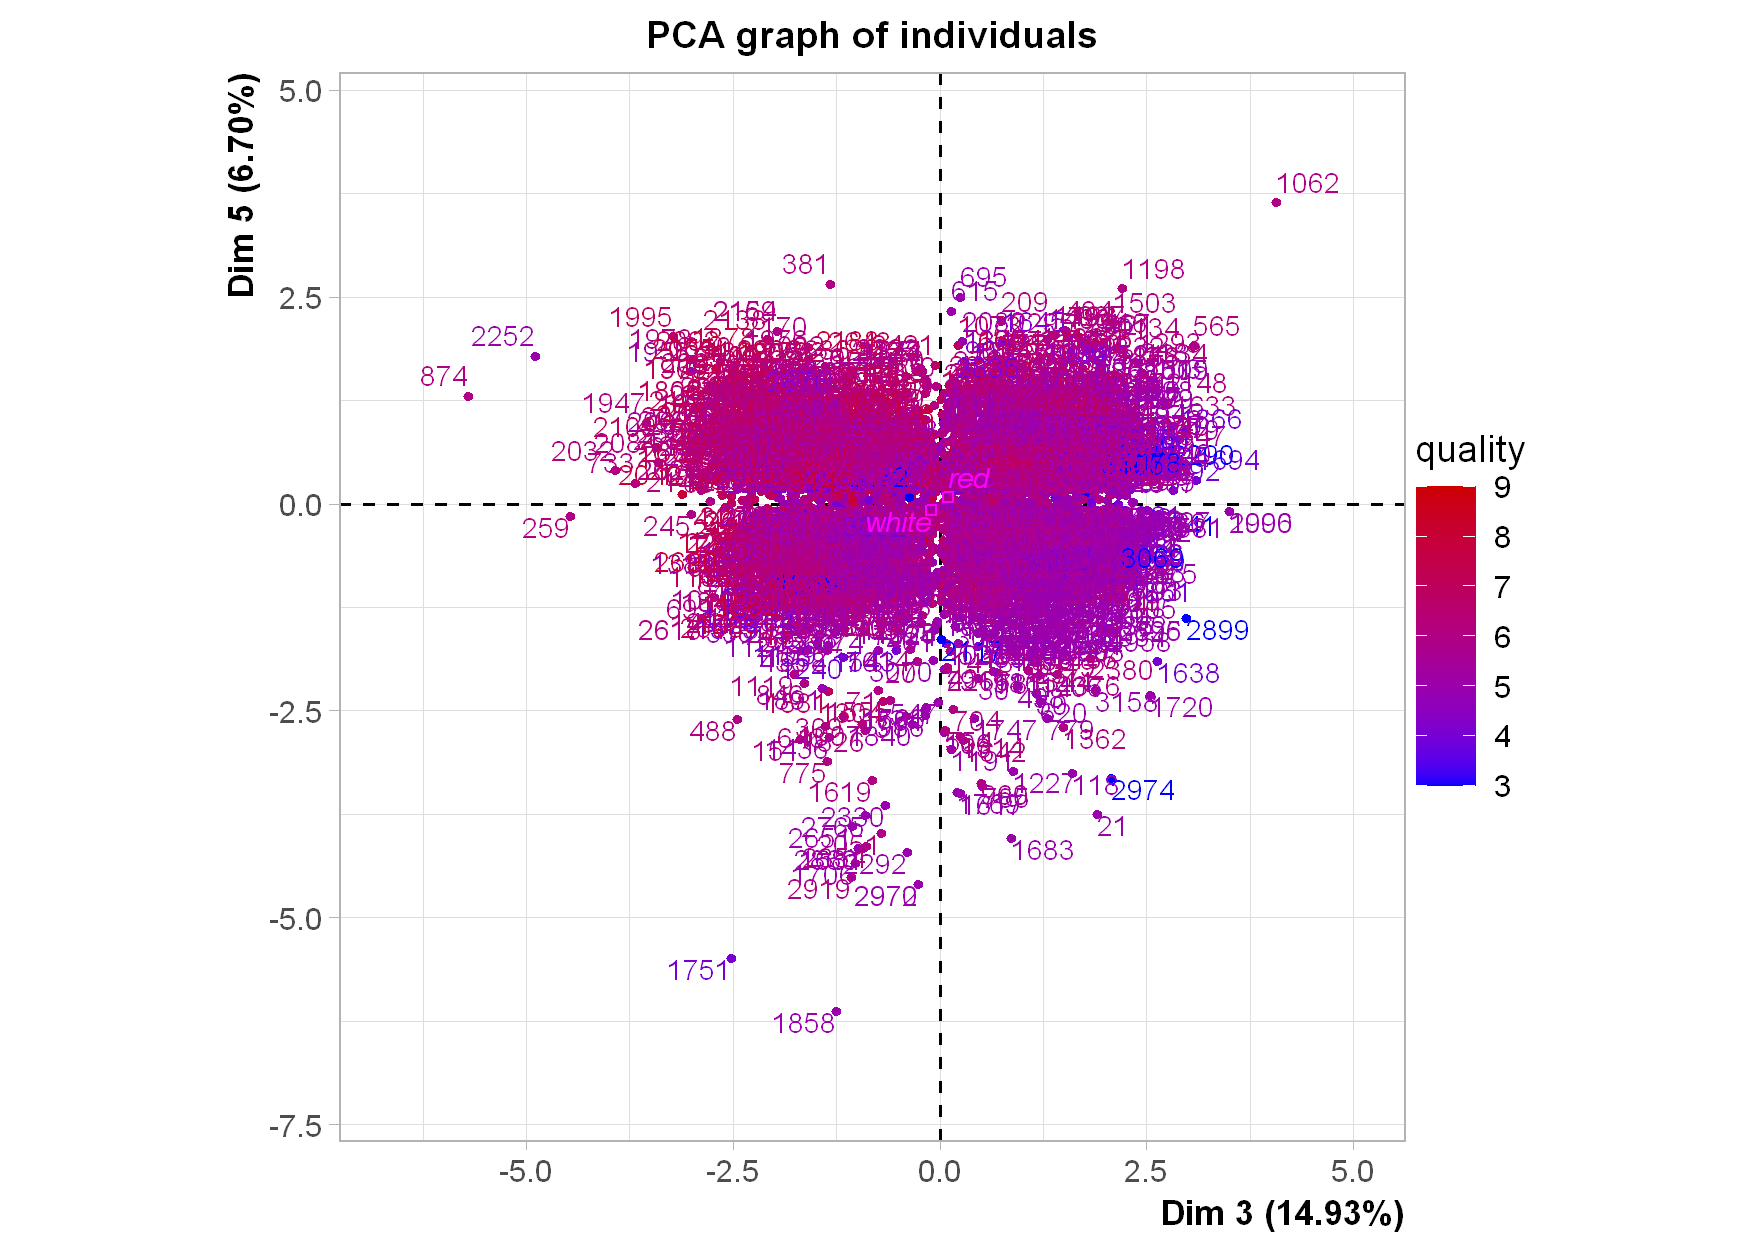

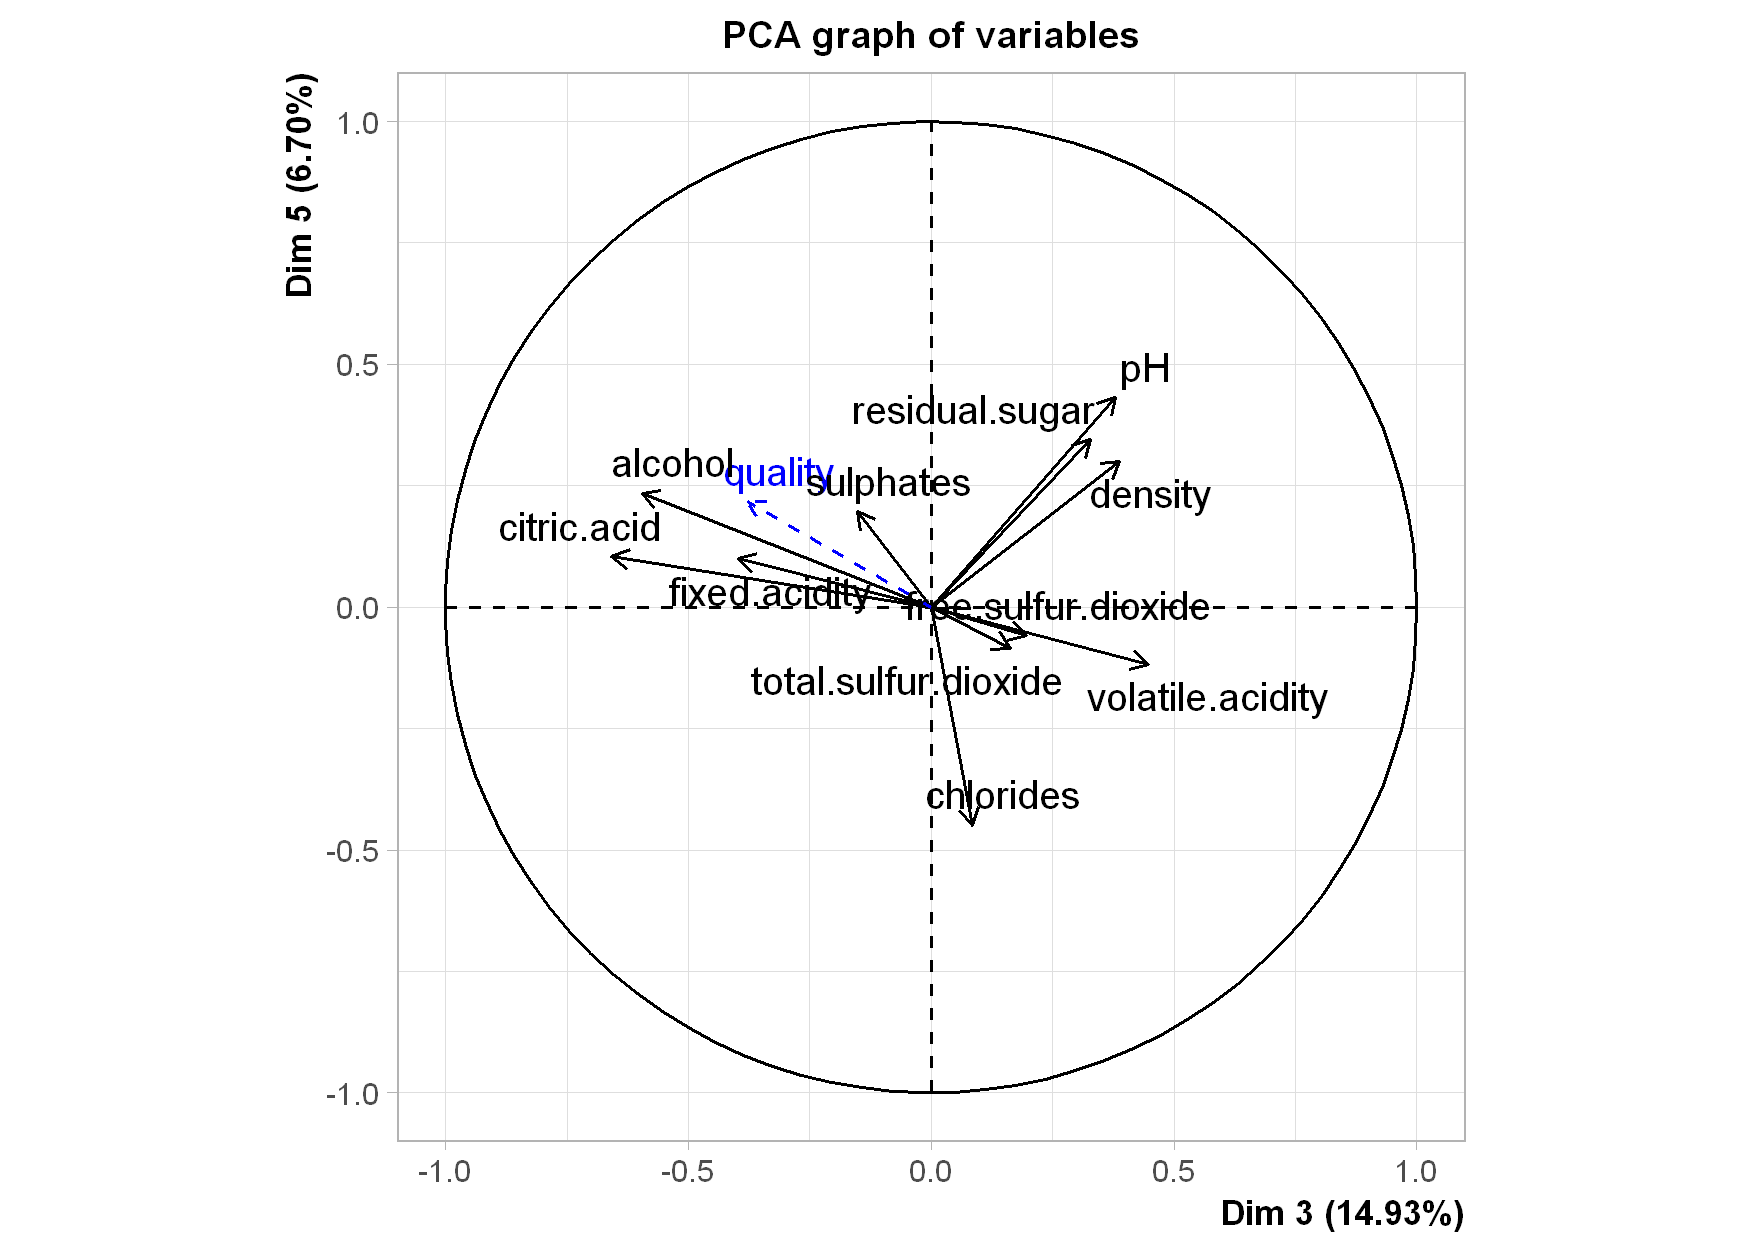

In [155]:
options(repr.plot.width = 7, rep.plot.height = 7, repr.plot.res = 250)
plot(res.pca,choix="ind",habillage=12,cex=0.7,axes=c(3,5))
plot(res.pca,choix="var",axes=c(3,5))

Nhận xét về các cá thể ta thấy rằng cấu trúc đám mây dữ liệu trong hai chiều này phân chia ra thành cụm chính rõ ràng theo 4 góc phần tư, như hình bốn cánh hoa, ngoài ra ta thấy rằng các điểm dữ liệu vùng biên, hay vùng ngoại lai đa phần là các điểm dữ liệu màu xanh dương hoặc xanh tím, là mức chất lượng thấp nhất trong tập dữ liệu khoảng 3 ~ 4 điểm. Mức độ chất lượng của sản phẩm rượu cũng tăng dần vào tâm của mỗi cánh hoa vì càng vào tâm các cánh hoa ta thấy rằng màu sắc nó chuyển từ tím sáng đỏ và đậm dần, điều này chứng tỏ mức độ điểm chất lượng tăng dần.  

Ngoài ra, ta có thể thấy được rằng chất lượng rượu nó tương quan rất tốt đối với các yếu tố, nồng độ cồn, độ chua cố định, thành phần axit citric, các gốc sulphat, điều này cho thấy chất lượng của rượu có thể tăng thêm nếu các yếu tố này tốt. Tuy nhiên, cũng có những yếu tố khác ảnh hưởng tiêu cực đến chất lượng của rượu như là mức độ bay hơi của rượu, nồng độ clo, độ đậm đặc của rượu.


Tuy nhiên, mức độ ý nghĩa của cả hai chiều này chỉ chiểm khoảng 21.63%, tỉ lệ khá thấp. Hay nói cách khác nếu chỉ dựa vào các phân tích thành phần hóa lý thì chưa đủ thông tin để kết luận được loại rượu vang đó có tốt hay không.

In [156]:
res.pca$quali.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
red,1.623442,0.0494572,0.1039025,-0.003756273,0.07915237
white,-1.623442,-0.0494572,-0.1039025,0.003756273,-0.07915237
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
red,0.9875037,0.0009164822,0.004044986,5.286633e-06,0.002347431
white,0.9875037,0.0009164822,0.004044986,5.286633e-06,0.002347431
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
red,50.19962,1.821258,4.584977,-0.2213375,5.212995
white,-50.19962,-1.821258,-4.584977,0.2213375,-5.212995
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
type,0.7882397,0.001037529,0.006575544,1.532383e-05,0.008500255


Từ kết quả biểu diễn đóng góp của biến giải thích phân loại rượu ta thấy đóng góp rất tốt trong chiều không gian Dim1, và hệ số cos2 của biến gần bằng 1 trong chiều không gian này. Ta biểu diễn nó trên hai chiều không gian chính để quan sát.

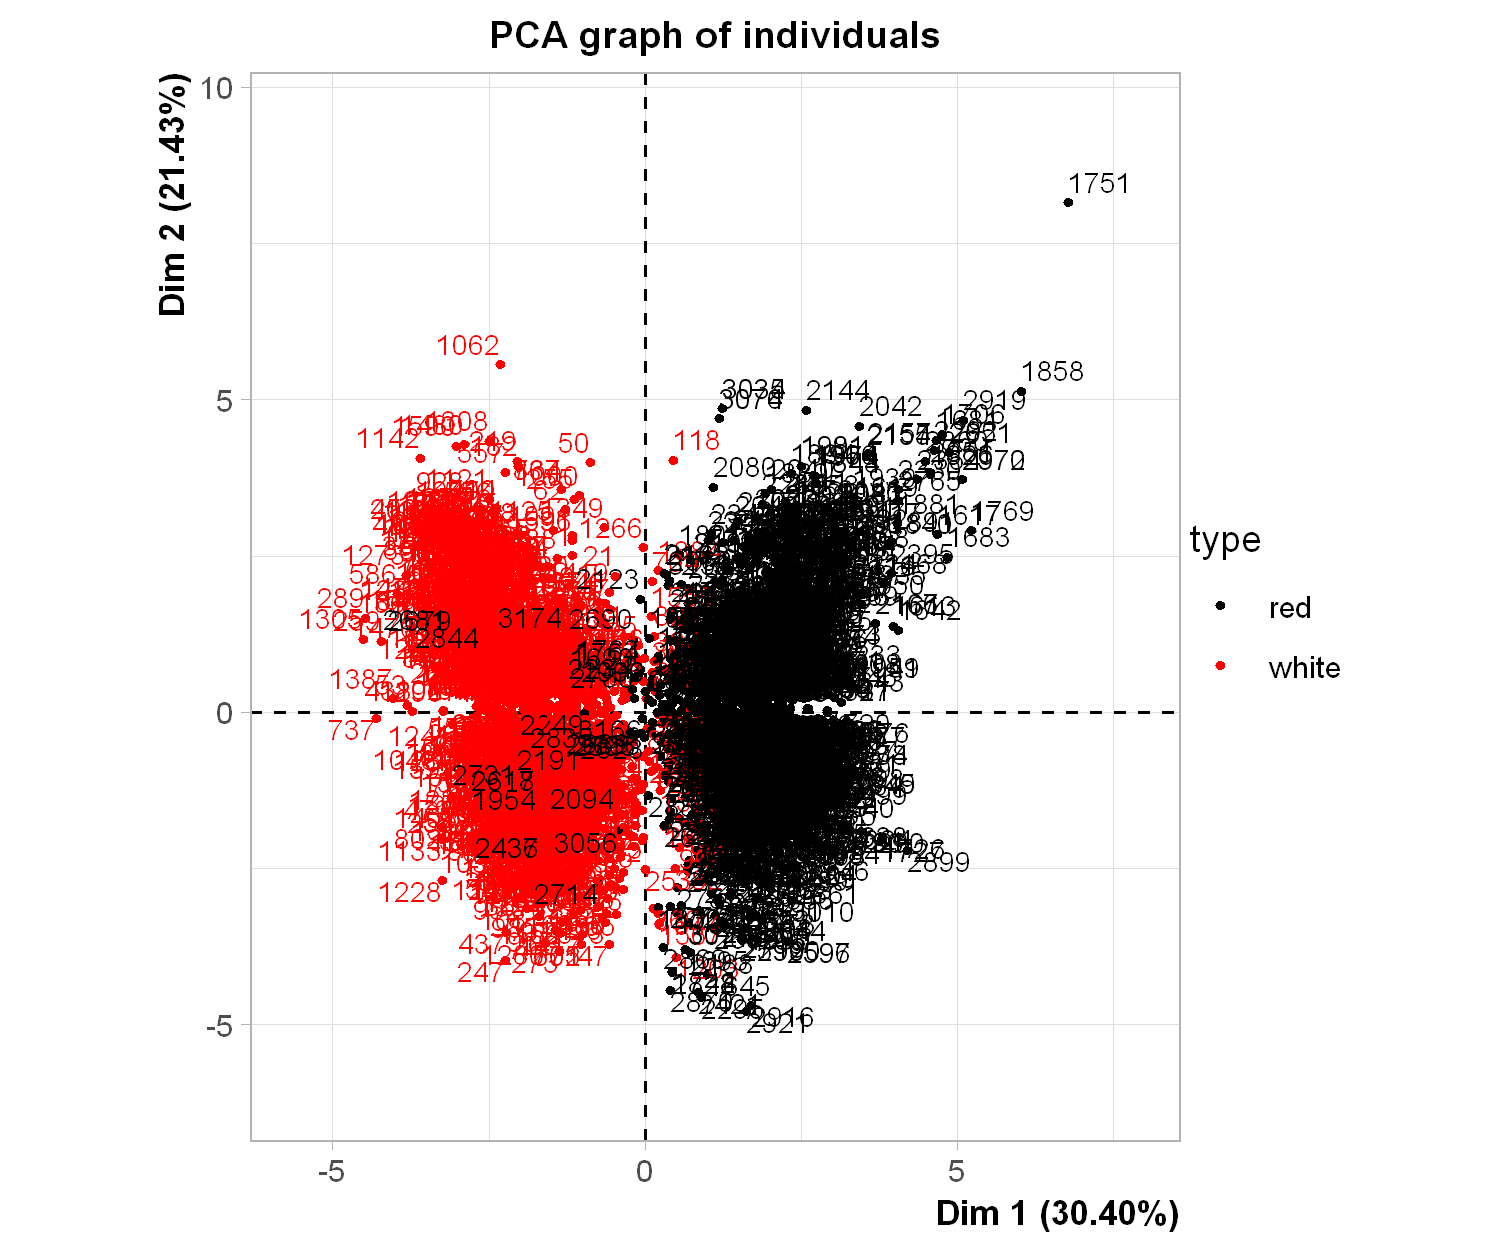

In [160]:
options(repr.plot.width = 6, rep.plot.height = 5, repr.plot.res = 250)
plot(res.pca,choix="ind",habillage=13,cex=0.7)

Khi biểu diễn dữ liệu theo biến giải thích về phân loại, ta thấy được rõ ràng dữ liệu tách hẳn ra thành 2 cụm dữ liệu riêng biệt là rượu vang đỏ và rượu vang trắng. Như vậy, ta có thể dự đoán rằng theo cách nhìn của hai chiều không gian chính thì rượu vang đỏ và rượu vang trắng sẽ có một vài thành phần hóa lý sẽ hoàn toàn khác biệt với nhau. Hay nói cách khác ta có thể hoàn toàn dựa vào thành phần hóa lý của rượu để dự đoán được loại rượu là vang đỏ hay vang trắng.

## 4. Dự đoán loại rượu dựa trên thành phần chính sau khi phân tích PCA

### 4.1. Xây dựng mô hình máy học

<center><img src="https://raw.githubusercontent.com/tquangsdh20/winedataset/main/.github/model.svg"></center>

Tiến hành extract dữ liệu để xây dựng model

In [217]:
mydat = data.frame(cbind(res.pca$ind$coord,type=wine_dat$type))
mydat[mydat$type == 2,'type'] <- 'white'
mydat[mydat$type == 1,'type'] <- 'red'
mydat$type <- as.factor(mydat$type)
head(mydat)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.1583155,2.50205297,0.2217197,1.26054836,0.03139377,white
2,-0.8394453,-1.23367395,-1.4868028,-0.59027497,-0.70410815,white
3,-0.8165065,-0.02031042,1.2824748,-1.41618571,-0.03556543,white
4,-3.3597111,0.70299773,-0.5510811,0.01412896,-0.26905030,white
5,-2.1528084,0.60018393,-0.5024772,-0.64938786,0.48874428,white
6,-2.8004525,2.84244601,0.3240747,-0.16091926,0.27056494,white


Tách biệt hai tập dữ liệu để training và testing cho model máy học

In [218]:
set.seed(1)
dat_smpl = sample.split(mydat$type,SplitRat=0.8)
train_dat = data.frame(subset(mydat,dat_smpl == T))
test_dat = data.frame(subset(mydat,dat_smpl == F))
# train_dat[train_dat$type == 2,'type'] <- 'white'
# train_dat[train_dat$type == 1,'type'] <- 'red'
# test_dat[test_dat$type == 2,'type'] <- 'white'
# test_dat[test_dat$type == 1,'type'] <- 'red'
train_dat$type <- as.factor(train_dat$type)
test_dat$type <- as.factor(test_dat$type)
summary(train_dat$type)

red white 
 1279  1279

Xây dựng CART Model

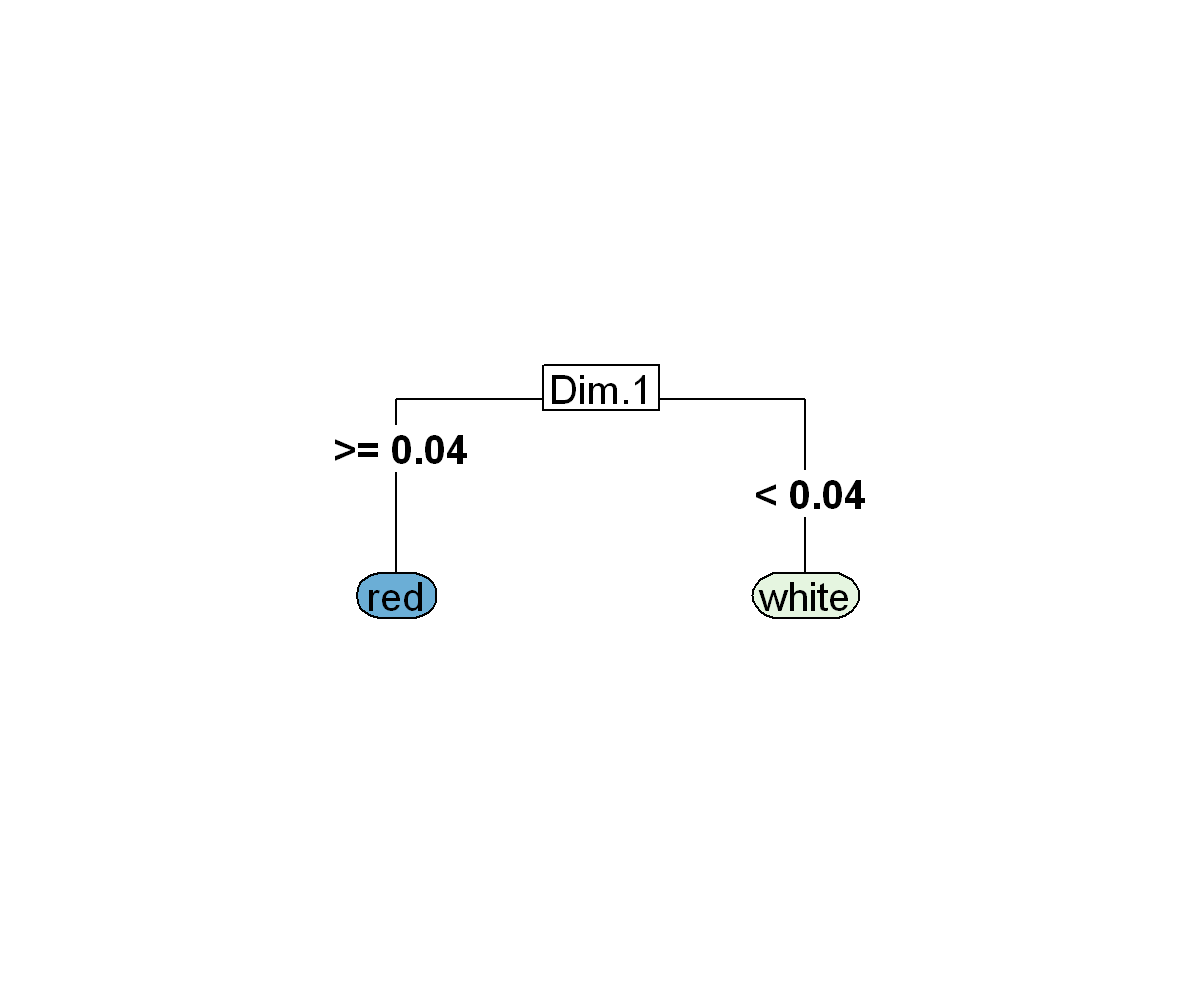

In [228]:
CART_model = rpart(type ~ ., train_dat)
options(repr.plot.width = 6, rep.plot.height = 6, repr.plot.res = 200)
rpart.plot(CART_model, extra = 0, type=5, tweak=1.2)

## 4.2. Đánh giá model

In [223]:
# Predict fraud classe with SMOTE sampling
print("The test data")
summary(test_dat$type)
print("Prediction")
predicted = predict(CART_model, test_dat, type = 'class')
summary(predicted)

[1] "The test data"


red white 
  320   320

[1] "Prediction"


red white 
  319   321

Từ trên cho thấy kết quả thực tế của tập dữ liệu testing thì có 320 trường hợp là rượu vang đỏ và 320 trường hợp là rượu vang trắng. Sau đó sẽ đem đi tiến hành dự đoán kết quả.

In [224]:
confusionMatrix(predicted,test_dat$type)

Confusion Matrix and Statistics

          Reference
Prediction red white
     red   314     5
     white   6   315
                                          
               Accuracy : 0.9828          
                 95% CI : (0.9695, 0.9914)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9656          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9812          
            Specificity : 0.9844          
         Pos Pred Value : 0.9843          
         Neg Pred Value : 0.9813          
             Prevalence : 0.5000          
         Detection Rate : 0.4906          
   Detection Prevalence : 0.4984          
      Balanced Accuracy : 0.9828          
                                          
       'Positive' Class : red             
                        

Theo như kết quả dự đoán thì ta thấy rằng model máy học trên dự đoán đúng 314/320 trường hợp rượu vang đỏ dựa trên thành phần lý hóa và dự đoán đúng được 315/320 trường hợp rượu vang trắng. Tỷ lệ chính xác của model theo kết quả trên là 98.28%.

## 5. Kết luận

Như vậy qua kết quả phân tích và đánh giá ta có thể rút ra được những kết luận sau đây:

- Không thể đánh giá chất lượng của rượu vang chỉ dựa trên các thành phần hóa lý. Trên thực tế nguyên liệu, các thành phần hóa lý của rượu chỉ đóng góp một phần trong việc làm tăng hương vị của rượu, ngoài ra điểm quan trong nữa để khiến rượu ngon có thể là do phương pháp ủ rượu và môi trường ủ rượu... hay các yếu tố mà không thể thống kê được

- Đối với việc phân loại rượu vang thì ngược lại, dựa vào kết quả phân tích chính của các yếu tố hóa lý của nó ta hoàn toàn có thể phân loại nó bằng cách ứng dụng các model máy học, để xây dựng một ứng dụng dự đoán loại rượu dựa trên các thành phần lý hóa của nó.